<a href="https://colab.research.google.com/github/AmShahKa/Machine-Learning/blob/main/Gradient%20Boosting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()


Saving titanic-train.csv to titanic-train.csv


In [2]:
import pandas as pd
import io
df=pd.read_csv('titanic-train.csv')
print(df)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

array([[<Axes: title={'center': 'PassengerId'}>,
        <Axes: title={'center': 'Survived'}>,
        <Axes: title={'center': 'Pclass'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'SibSp'}>,
        <Axes: title={'center': 'Parch'}>],
       [<Axes: title={'center': 'Fare'}>, <Axes: >, <Axes: >]],
      dtype=object)

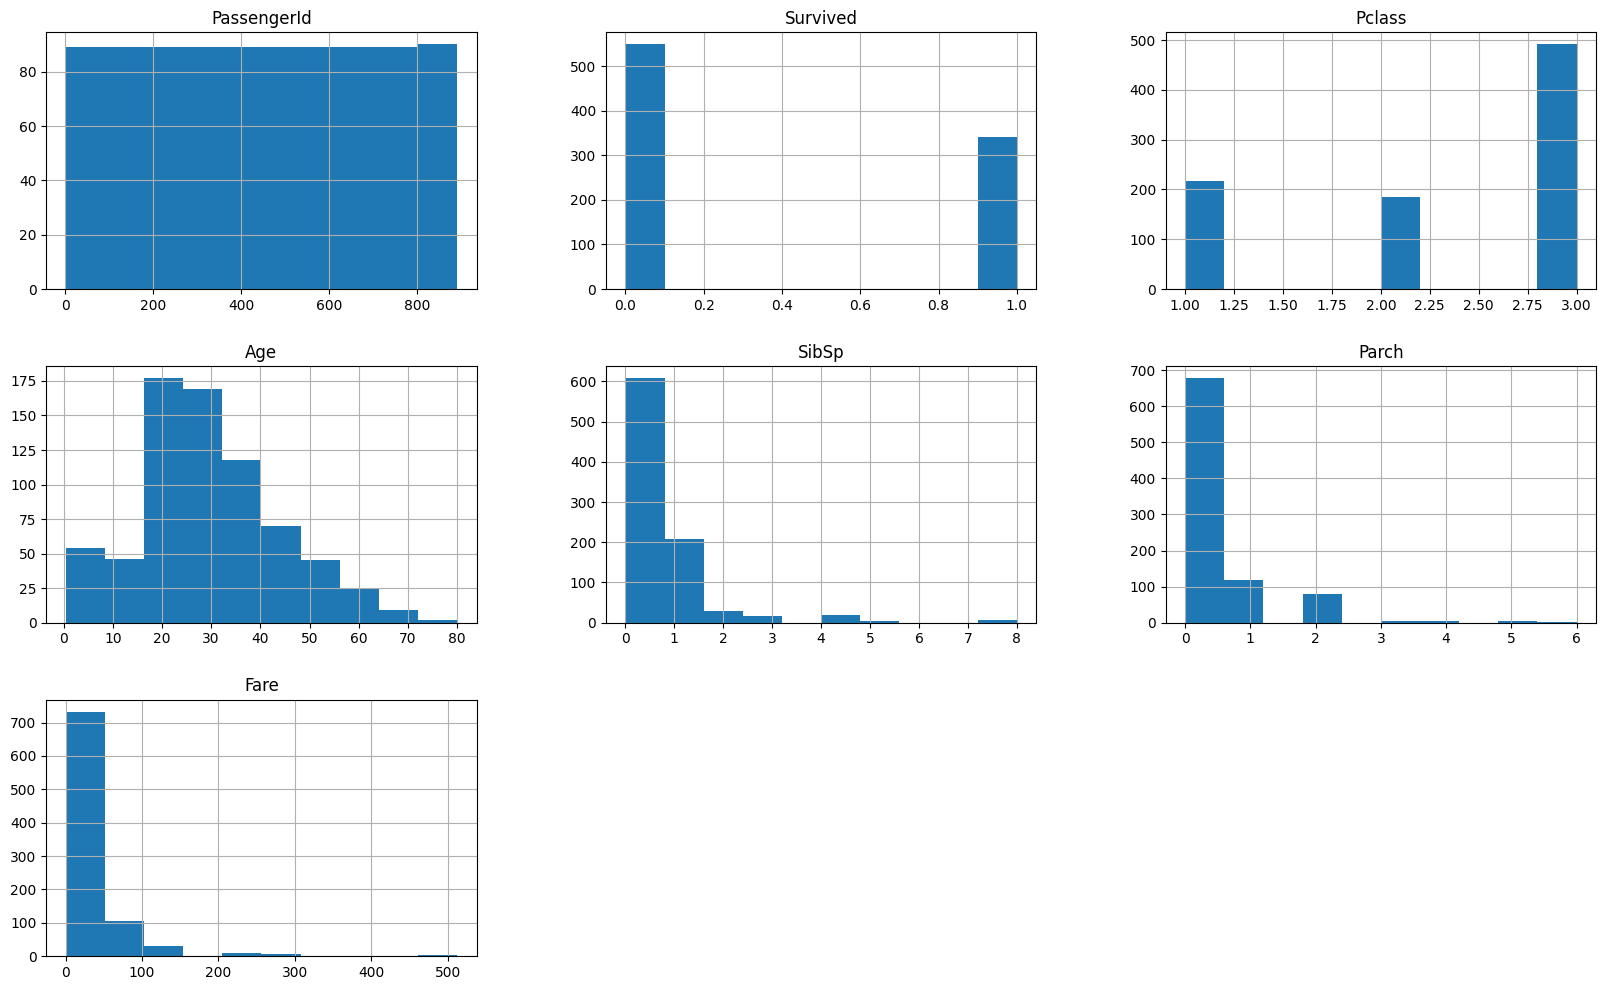

In [3]:

df.hist(figsize=(20,12))

In [14]:
# Importing the required libraries
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier


# Loading the dataset
train_data=pd.read_csv('titanic-train.csv')
test_data=pd.read_csv('titanic-train.csv')

#Performing data preprocessing
y_train=train_data['Survived']
train_data.drop(labels='Survived', axis=1, inplace=True)


# Concatenating a new dataset
full_data=train_data.append(test_data)

#Dropping the columns that are not required
drop_columns=['Name','Age','SibSp','Ticket','Cabin','Parch','Embarked']
full_data.drop(labels=drop_columns, axis=1 , inplace=True)


# Assigning empty sets a value of 0
full_data=pd.get_dummies(full_data, columns=['Sex'])
full_data.fillna(value=0.0 ,inplace=True )

#Splitting the data into train and test sets
X_train=full_data.values[0:891]
X_test=full_data.values[891:]

#Scaling the data using MinMaxScaler
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

#Selecting the size of the dataset for testing
state=12
test_size=0.30
X_train , X_val , y_train, y_val=train_test_split(X_train,y_train,test_size=test_size,random_state=state)

#Assigning the learning rate to evaluate the classifier’s performance
lr_list =[0.05 , 0.75 , 0.1 , 0.25 , 0.5 , 0.75 , 1]
for learning_rate in lr_list:
  gb_clf=GradientBoostingClassifier(n_estimators=20 , learning_rate=learning_rate,max_features=2,max_depth=2,random_state=0)
  gb_clf.fit(X_train,y_train)

  print ('learning_rate: ',learning_rate)
  print('Accuracy score (training):{0:.3f}'.format(gb_clf.score(X_train,y_train)))
  print('Accuracy score (validation):{0:.3f}'.format(gb_clf.score(X_val,y_val)))


learning_rate:  0.05
Accuracy score (training):0.806
Accuracy score (validation):0.731
learning_rate:  0.75
Accuracy score (training):0.862
Accuracy score (validation):0.765
learning_rate:  0.1
Accuracy score (training):0.804
Accuracy score (validation):0.754
learning_rate:  0.25
Accuracy score (training):0.822
Accuracy score (validation):0.757
learning_rate:  0.5
Accuracy score (training):0.851
Accuracy score (validation):0.787
learning_rate:  0.75
Accuracy score (training):0.862
Accuracy score (validation):0.765
learning_rate:  1
Accuracy score (training):0.856
Accuracy score (validation):0.750


<ipython-input-14-e617d80b4e02>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  full_data=train_data.append(test_data)


In [17]:
gb_clf2=GradientBoostingClassifier(n_estimators=20 , learning_rate=0.5 ,max_features=2,max_depth=2,random_state=0)
gb_clf2.fit(X_train,y_train)
predictions=gb_clf2.predict(X_val)

print('Confusion Matrix:')
print(confusion_matrix(y_val,predictions))

print('Classification Report:')
print(classification_report(y_val,predictions))

Confusion Matrix:
[[148  13]
 [ 44  63]]
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.92      0.84       161
           1       0.83      0.59      0.69       107

    accuracy                           0.79       268
   macro avg       0.80      0.75      0.76       268
weighted avg       0.79      0.79      0.78       268

